## Exporing Supervised Machine Learning: Linear Regression
    In this task, the goal is to build a linear model to predict the percentage of marks of student that will be scored after studying certain amounts of hours. This simple model is linear regression based on linear modelling and just involves two variable

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

## Collecting Data

In [2]:
link = "http://bit.ly/w-data"
stu_data = pd.read_csv(link)

In [3]:
# Top 5 data
stu_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Analysis

In [4]:
# description of data(only for non object types)

stu_data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
# analysing data types of different columns

stu_data.dtypes

Hours     float64
Scores      int64
dtype: object

## Data Wrangling

In [10]:
# checking whether any missing values in data or not?

stu_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

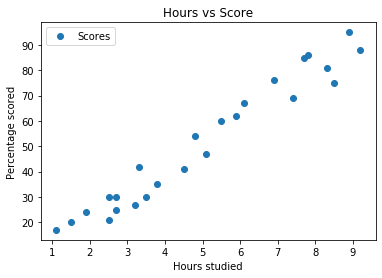

In [13]:
# checking relationship between hours studied and percentage scored
stu_data.plot(x = "Hours", y = "Scores" , style = 'o')
plot.title("Hours vs Score")
plot.xlabel('Hours studied')
plot.ylabel('Percentage scored')
plot.show()

In [14]:
#As observing the graph there is a linear relationship. moreover there is no outliers that needs treatment

In [16]:
x = stu_data.iloc[:,:-1].values
y = stu_data.iloc[:, 1].values

# Train and Test data
   Splitting the Dataset into train and test data using 80 and 20 percent respectively

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .2, random_state = 0)

In [18]:
#making a linear regression model
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

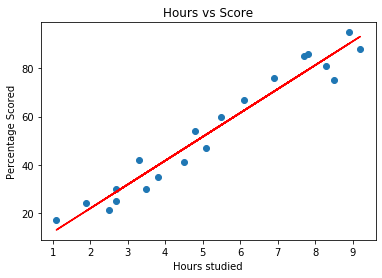

Intercept: 2.018160041434662
Coefficint: [9.91065648]


In [21]:
# Plottin regressor line
plot.scatter(X_train, Y_train)
plot.plot(X_train, l_reg.predict(X_train), color = 'red')
plot.title('Hours vs Score')
plot.xlabel('Hours studied')
plot.ylabel('Percentage Scored')
plot.show()
print("Intercept:", l_reg.intercept_)
print("Coefficint:", l_reg.coef_)

In [25]:
# predicting the model
Y_pred = l_reg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [26]:
# creating new dataframe for predicted value and actual value on test data set
df = pd.DataFrame({"True_value": Y_test, "Predicted_value": Y_pred})
df.head()

,True_value,Predicted_value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [51]:
# predicting score for the 9.25 hours
hours = [[9.25]]
pred = l_reg.predict(hours)
print('Predicted score:', pred[0])
#rounding of the values to two nearest integer
print("Predicted rounded off score for 9.25 hours study:", round(pred[0]))

predicted score: 93.69173248737539
Predicted rounded off score for 9.25 hours study: 94.0


## Accuracy

In [47]:
# calculating MAE, MSE and RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Erro:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Erro: 4.647447612100373


# Result
  The predicted score if someone studies for 9.25 hours a day is 94 percent(rounded to nearest integer).